## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('AviationData.csv', encoding='iso-8859-1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Checking the shape of the dataframe

In [3]:
df.shape

(88889, 31)

### Checking the overall informaion of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## A statistical description of the dataframe 

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Checking the avalilable column names

In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Data Preparation and Cleaning
### Replace dots with a space and strip whitespace from the column names

In [7]:
df.columns = df.columns.str.replace('.', ' ', regex=False).str.strip().str.title()
df.columns


Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

## Dealing with Missing Values
### Number of missing values for each column

In [8]:
df.isna().sum()


Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Code              38757
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: i

## Identitying the relvant columns for the data analysis

In [9]:
relevant_columns = ['Event Id', 'Event Date',
       'Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition']
df_relevant= df[relevant_columns]
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


## Missing values for the relevant columns

In [10]:
df_relevant.isnull().sum()

Event Id                      0
Event Date                    0
Location                     52
Country                     226
Injury Severity            1000
Aircraft Damage            3194
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Purpose Of Flight          6192
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
dtype: int64

## Columns that will drop missing values

In [11]:
drop_columns = ['Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight',
       'Weather Condition']
df_relevant = df_relevant.dropna(subset = drop_columns)
df_relevant.isnull().sum()

Event Id                      0
Event Date                    0
Location                      0
Country                       0
Injury Severity               0
Aircraft Damage               0
Make                          0
Model                         0
Amateur Built                 0
Number Of Engines             0
Engine Type                   0
Purpose Of Flight             0
Total Fatal Injuries       9386
Total Serious Injuries    10248
Total Minor Injuries       9525
Total Uninjured            4692
Weather Condition             0
dtype: int64

## Columns that need replacing the null values

In [12]:
replace_columns = ['Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']

df_relevant = df_relevant.fillna(0)
df_relevant.isnull().sum()

Event Id                  0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft Damage           0
Make                      0
Model                     0
Amateur Built             0
Number Of Engines         0
Engine Type               0
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
dtype: int64

### Location Columns 

In [13]:
df_relevant['Location'] = df_relevant['Location'].str.title().str.replace(r',\s*(\w{2})$', lambda x: x.group(0).upper(), regex=True)
df_relevant.head()                                                 

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC


## Extracting the year from the Event Date Column

In [14]:
df_relevant['Year'] = df['Event Date'].str[0:4]
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,1948
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


## Remove data for years before 1962
### The Year column values seem to be in a string format.

In [15]:

df_relevant['Year'] = pd.to_numeric(df_relevant['Year'], errors='coerce')
df_relevant = df_relevant[df_relevant['Year'] >= 1962]
df_relevant.sample(n=10)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
30465,20001211X14601,1992-05-25,"Westhampton Bch, NY",United States,Non-Fatal,Substantial,Piper,PA-34-200,No,2.0,Reciprocating,Instructional,0.0,0.0,0.0,3.0,VMC,1992
83881,20190906X30739,2019-09-05,"Tahlequah, OK",United States,Non-Fatal,Substantial,Cessna,310,No,2.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,2019
18948,20001213X32451,1987-10-17,"Pocatello, ID",United States,Non-Fatal,Destroyed,Napper,VANCRAFT,Yes,1.0,Reciprocating,Unknown,0.0,0.0,0.0,1.0,VMC,1987
21583,20001213X27049,1988-10-01,"Mckinney, TX",United States,Non-Fatal,Substantial,Shannon,J-BIRD,Yes,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,1988
40058,20001208X06314,1996-07-12,"Lascassas, TN",United States,Non-Fatal,Destroyed,Tocholke,1300-Z MAX,Yes,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,1996
85982,20210407102887,2021-03-16,"Fort Pierce, FL",United States,Non-Fatal,Substantial,PIPER,PA-28-161,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,2021
64660,20080729X01122,2008-06-05,"Roseboro, NC",United States,Non-Fatal,Substantial,Cirrus Design Corp.,SR22,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2008
9869,20001214X41017,1984-09-22,"Willshire, OH",United States,Non-Fatal,Substantial,Beech,B33,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1984
14443,20001213X33358,1986-04-19,"St. Augustine, FL",United States,Non-Fatal,Substantial,Beech,B95A,No,2.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,1986
21798,20001213X27022,1988-10-30,"Parker, CO",United States,Fatal(1),Destroyed,Jones,CHRISTEN EAGLE II,Yes,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,1988


### Purpose of Flight and Make Columns have inconsistent capitalization

In [16]:
df_relevant[['Make', 'Purpose Of Flight', 'Aircraft Damage']] = df_relevant[['Make', 'Purpose Of Flight', 'Aircraft Damage']].apply(lambda col: col.str.title())
df_relevant.sample(n=10)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
49129,20001212X21682,2000-08-17,"Chapin, IL",United States,Non-Fatal,Substantial,Cessna,150M,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,2000
15994,20001213X34722,1986-09-27,"Nashville, TN",United States,Non-Fatal,Substantial,Beech,35A,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1986
59957,20051214X01972,2005-12-13,"Pinon, NM",United States,Fatal(1),Destroyed,Cessna,172S,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2005
12280,20001214X37232,1985-07-14,"Ames, IA",United States,Non-Fatal,Substantial,De Havilland,DH 82A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,1.0,VMC,1985
25403,20001212X23040,1990-05-03,"Anchorage, AK",United States,Non-Fatal,Substantial,Cessna,180C,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1990
77317,20150929X53052,2015-09-14,"Nikolai, AK",United States,Non-Fatal,Substantial,Dehavilland,DHC 2 MK.I,No,1.0,Reciprocating,Positioning,0.0,0.0,0.0,1.0,VMC,2015
45458,20001211X11518,1998-12-30,"Murfreesboro, TN",United States,Non-Fatal,Substantial,Bell,47G-3B-2,No,1.0,Turbo Shaft,Other Work Use,0.0,0.0,0.0,2.0,VMC,1998
63171,20071001X01480,2007-08-14,"Moab, UT",United States,Non-Fatal,Substantial,Aviat,Husky A-1B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2007
8046,20001214X39256,1984-04-25,"Albuquerque, NM",United States,Non-Fatal,Substantial,Piper,PA-36-375,No,1.0,Reciprocating,Ferry,0.0,0.0,0.0,1.0,VMC,1984
4447,20001214X42628,1983-04-19,"Rice Lake, WI",United States,Non-Fatal,Substantial,Piper,PA-28-180,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,1983


## Remove leading and trailing whitespaces from all string columns in the DataFrame

In [17]:
df_relevant = df_relevant.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
7,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982


## Creating a csv file for the cleaned data

In [18]:
df_relevant.to_csv('cleaned_AviationData.csv', index=False)

In [19]:
df_cleaned = pd.read_csv('cleaned_AviationData.csv')
df_cleaned.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
1,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
2,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
3,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
4,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75334 entries, 0 to 75333
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                75334 non-null  object 
 1   Event Date              75334 non-null  object 
 2   Location                75334 non-null  object 
 3   Country                 75334 non-null  object 
 4   Injury Severity         75334 non-null  object 
 5   Aircraft Damage         75334 non-null  object 
 6   Make                    75334 non-null  object 
 7   Model                   75334 non-null  object 
 8   Amateur Built           75334 non-null  object 
 9   Number Of Engines       75334 non-null  float64
 10  Engine Type             75334 non-null  object 
 11  Purpose Of Flight       75334 non-null  object 
 12  Total Fatal Injuries    75334 non-null  float64
 13  Total Serious Injuries  75334 non-null  float64
 14  Total Minor Injuries    75334 non-null

In [21]:
df_cleaned.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year
count,75334.000000,75334.000000,75334.000000,75334.000000,75334.000000,75334.000000
mean,1.116614,0.391178,0.203188,0.281639,2.181817,1997.379337
std,0.379833,2.811848,0.747979,1.213147,14.786817,11.139778
min,0.000000,0.000000,0.000000,0.000000,0.000000,1962.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1996.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2006.000000
max,8.000000,270.000000,81.000000,125.000000,699.000000,2022.000000


In [22]:
df_cleaned.shape

(75334, 18)

## 1. Is it safe to invest in Aviation Industry?
### The aviation industry is an old industry that has evolved over the years. To know if the industry is a good investment, it is important to analyze how safer the industry is across time. This will be done by showing the number of accidents per year.

In [23]:
# Sort the 'Year' values in ascending order and arrange corresponding counts
years = sorted(df_cleaned['Year'].value_counts().index.tolist())
number_of_accidents_per_year = [df_cleaned['Year'].value_counts()[year] for year in years]

print("Years (sorted):", years)
print("Number of accidents (sorted):", number_of_accidents_per_year)


Years (sorted): [1962, 1974, 1977, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Number of accidents (sorted): [1, 1, 1, 1, 3503, 3411, 3317, 2996, 2749, 2699, 2606, 2443, 2419, 2386, 2285, 2227, 2091, 2149, 2039, 1946, 1993, 1992, 1913, 1657, 1672, 1707, 1599, 1661, 1491, 1621, 1521, 1449, 1395, 1437, 1441, 1168, 1139, 1163, 1210, 1171, 1170, 1042, 727, 316, 409]


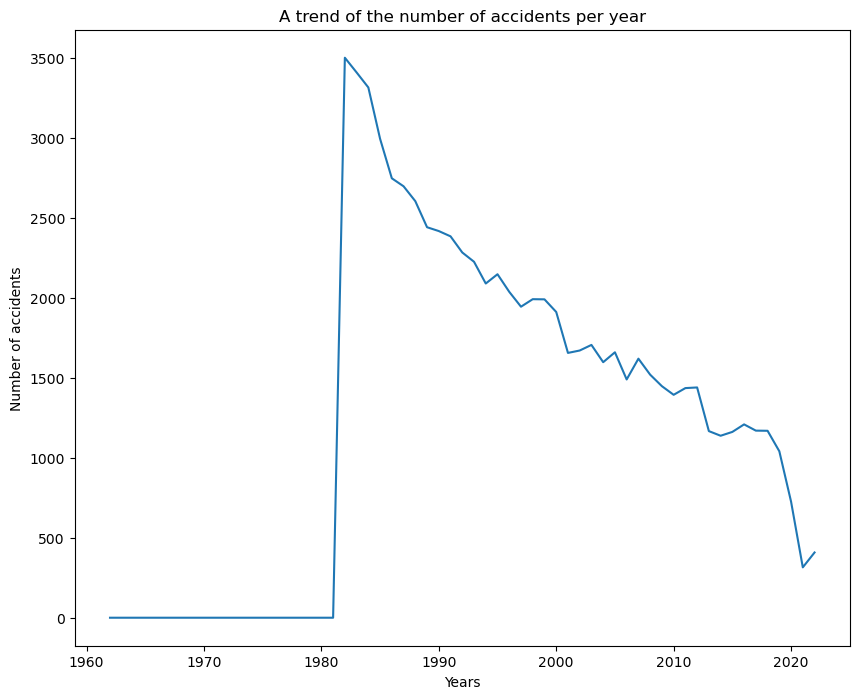

In [24]:
#plot a line graph that shows the trend of accidents overtime
#I included the years from 1982 moving forward as before there were not many flights
x = years
y = number_of_accidents_per_year
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Number of accidents')
ax.set_title('A trend of the number of accidents per year')
plt.show();

## Purpose of the flight vs the number of accidents

In [26]:
Counts_of_accidents = df_cleaned['Purpose Of Flight'].value_counts()
purpose_of_flight = Counts_of_accidents.index


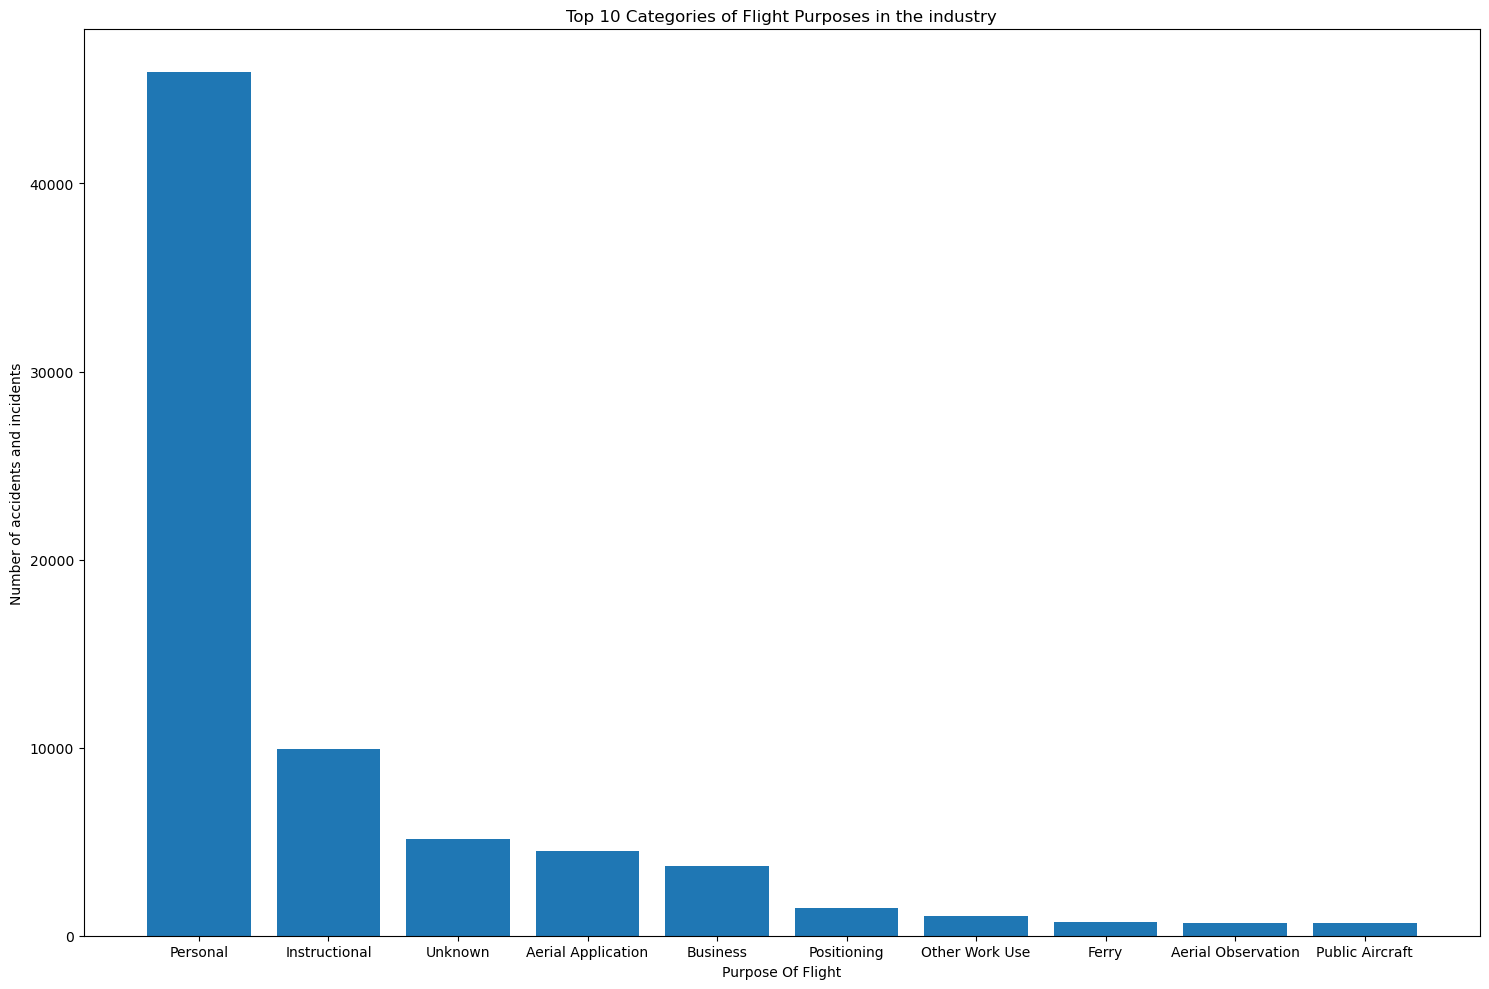

In [37]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(purpose_of_flight[:10],Counts_of_accidents[:10])
ax.set_xlabel('Purpose Of Flight')
ax.set_ylabel('Number of accidents and incidents')
ax.set_title('Top 10 Categories of Flight Purposes in the industry')
plt.show();

## What aircraft makes are notorious for causing the most accidents?

In [84]:
Counts_of_accidents_incidents = df_cleaned['Make'].value_counts()
Make_of_Aircraft = Counts_of_accidents_incidents.index
print(Counts_of_accidents_incidents)
print(Make_of_Aircraft)

Make
Cessna               24934
Piper                13740
Beech                 4772
Bell                  2107
Mooney                1254
                     ...  
C.B. Withun              1
Reinhold                 1
Zeidler                  1
W.S. Bowers, Jr.         1
Stephen J Hoffman        1
Name: count, Length: 6884, dtype: int64
Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca',
       'Robinson', 'Hughes', 'Boeing',
       ...
       'The Old Hen Crow', 'Horner-Ryan', 'Ilyushin', 'Tomschin',
       'Becker Wag Aero', 'C.B. Withun', 'Reinhold', 'Zeidler',
       'W.S. Bowers, Jr.', 'Stephen J Hoffman'],
      dtype='object', name='Make', length=6884)


## The top 10 Makes with most accidents

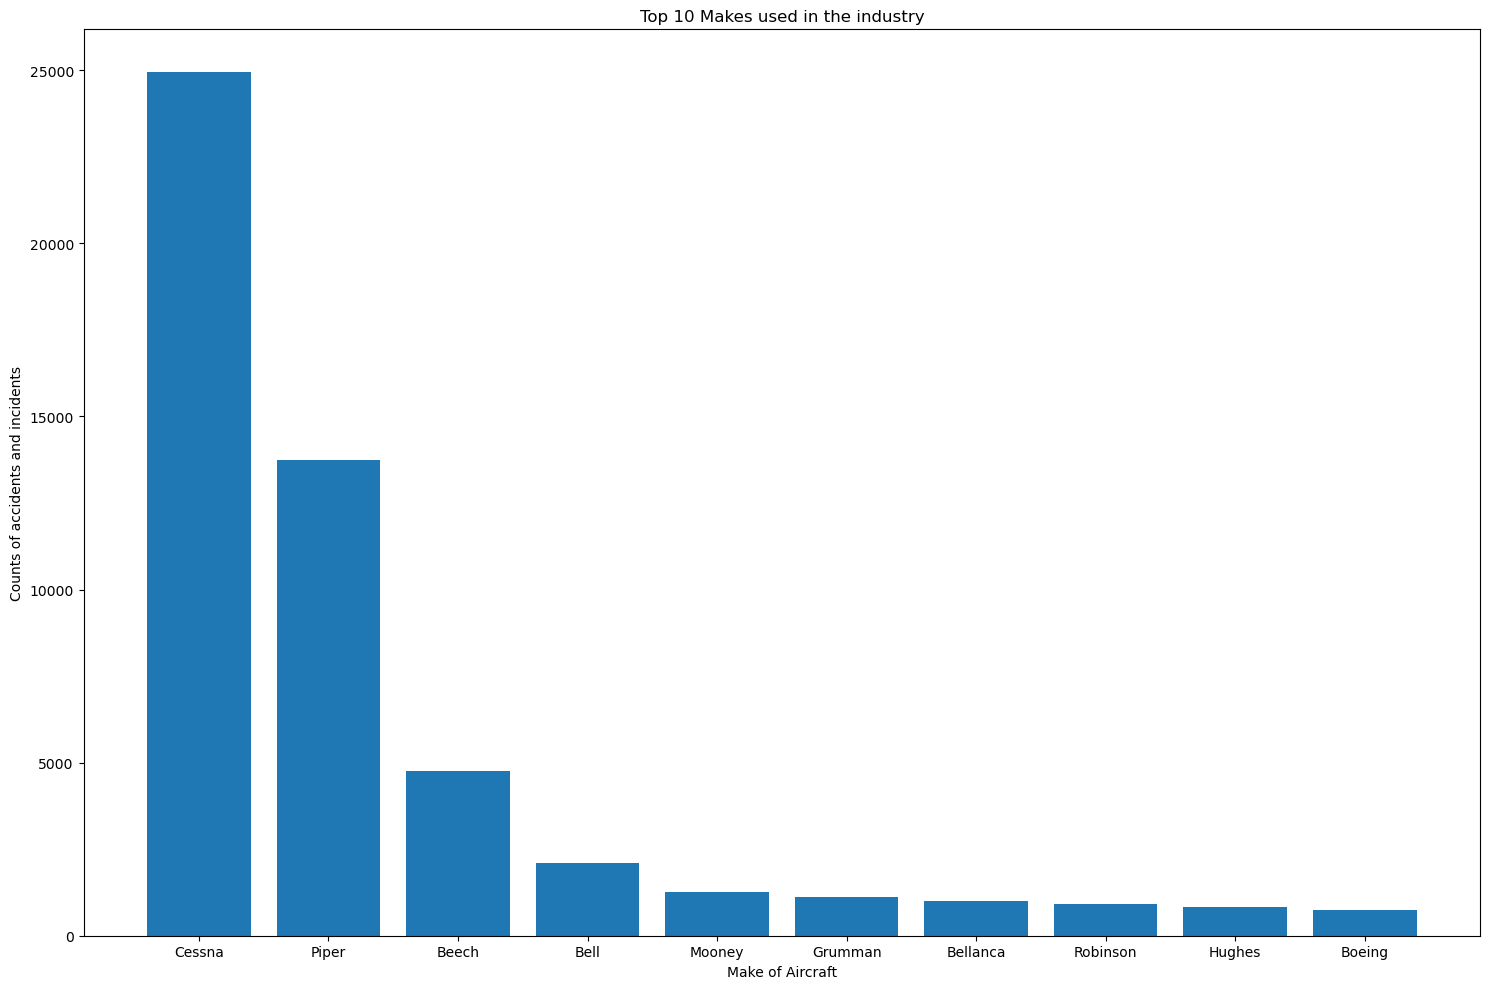

In [81]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(Make_of_Aircraft[:10],Counts_of_accidents_incidents[:10])
ax.set_xlabel('Make of Aircraft')
ax.set_ylabel('Counts of accidents and incidents')
ax.set_title('Top 10 Makes used in the industry')
plt.show();

In [ ]:
## weather Conditions vs no of accidents


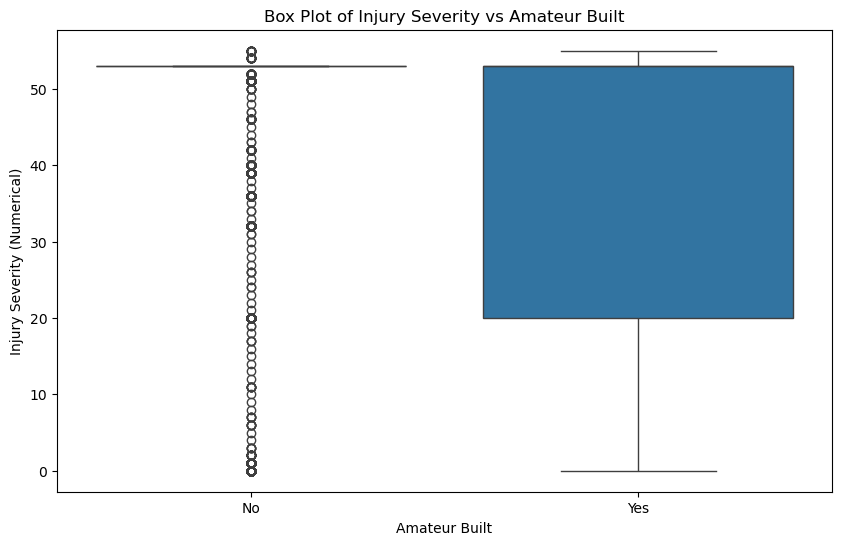

In [35]:
# Convert 'Injury Severity' from categorical data to numerical values
df_cleaned['Injury Severity Numeric'] = pd.Categorical(df_cleaned['Injury Severity']).codes
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot using the ax object
sns.boxplot(x='Amateur Built', y='Injury Severity Numeric', data=df_cleaned, ax=ax)

# Set title and labels using the ax object
ax.set_title('Box Plot of Injury Severity vs Amateur Built')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Injury Severity (Numerical)')
plt.show();

In [36]:
'''
For Non-Amateur-Built (No): The many dots suggest a concentration of similar injury severity levels, which indicates low variability and potentially similar factors contributing to those injuries.
For Amateur-Built (Yes): The box plot indicates a wider range of injury severity, suggesting more diverse outcomes, possibly due to differences in construction quality, design, or other factors that affect safety.
'''

'\nFor Non-Amateur-Built (No): The many dots suggest a concentration of similar injury severity levels, which indicates low variability and potentially similar factors contributing to those injuries.\nFor Amateur-Built (Yes): The box plot indicates a wider range of injury severity, suggesting more diverse outcomes, possibly due to differences in construction quality, design, or other factors that affect safety.\n'